In [94]:
import numpy as np
import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sb

In [42]:
data1 = pd.read_csv("averageExpressionPerCluster-full_dataset_biexp_aligned.csv")

In [43]:
data2 = pd.read_csv("averageExpressionPerCluster-org.combinedR2_clusters_names.csv")

In [109]:
#data1.drop(0, axis=1)
# CD129 appears as 
geneToMarkerDict = {'AQP4': 'AQP4', 'CD24': 'CD24', 'CD44': 'CD44', 'CXCR4': 'CD184', 'FUT4': 'CD15', 
                    'HEPACAM': 'HepaCAM', 'ITGB1': 'CD29', 'NCAM1': 'CD56', 'NKX6-2': 'O4', 
                    'PDGFRA': 'CD140a', 'PROM1': 'CD133', 'SLC1A3': 'GLAST', 'TFRC': 'CD71'}

def replaceGeneByMarker(df):
    modifiedDf = pd.DataFrame()
    for col in df.columns:
        modifiedDf[geneToMarkerDict[col]] = df[col]
        
    return modifiedDf

In [112]:
#    print(np.corrcoef(data1[row], data2[row], rowvar=False))
def getCorrMatrix(d1, d2):
    corrMatrix = np.zeros( (d1.index.size, d2.index.size), dtype=np.float)
    for i in d1.index:
        for j in d2.index:
            corrCoef = np.corrcoef(d1.iloc[i], d2.iloc[j], rowvar=False)[0,1]
            corrMatrix.itemset((i,j), corrCoef)
    
    return corrMatrix

def orderColumnsAlphab(df):
    return df.reindex(sorted(df.columns), axis=1)
        
#print(getCorrMatrix(data1, data2))
orderedD1 = data1.reindex(sorted(data1.columns), axis=1)
orderedMarkerNameD2 = orderColumnsAlphab(data2)

[[ 1.         -0.01942562]
 [-0.01942562  1.        ]]
[[ 1.        -0.2585308]
 [-0.2585308  1.       ]]
[[1.        0.0936616]
 [0.0936616 1.       ]]


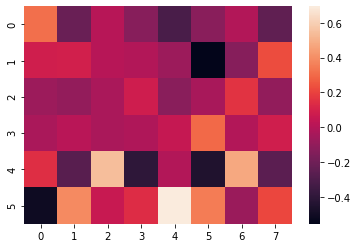

In [113]:
heatMap = sb.heatmap(getCorrMatrix(orderedD1, orderedMarkerNameD2))

In [102]:
data3 = pd.read_csv("averageExpressionPerCluster-manno_human.csv")

In [115]:
orderedMarkerNameD3 = orderColumnsAlphab(replaceGeneByMarker(data3))

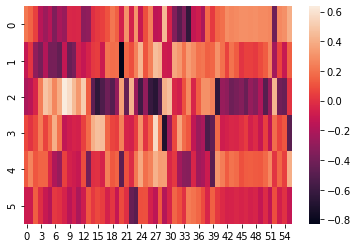

In [116]:
heatmap2 = sb.heatmap(getCorrMatrix(orderedD1, orderedMarkerNameD3))

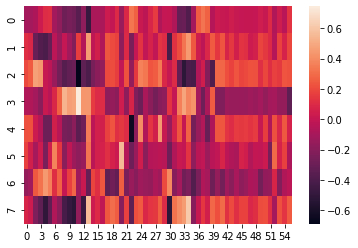

In [117]:
heatmap3 = sb.heatmap(getCorrMatrix(orderedMarkerNameD2, orderedMarkerNameD3))

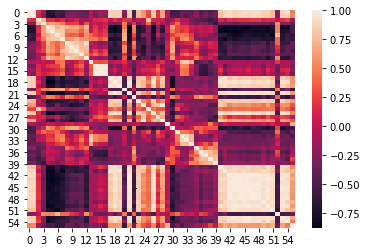

In [118]:
heatmap4 = sb.heatmap(getCorrMatrix(orderedMarkerNameD3, orderedMarkerNameD3))

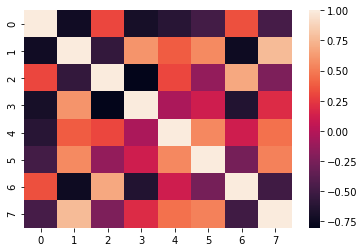

In [119]:
heatmap5 = sb.heatmap(getCorrMatrix(orderedMarkerNameD2, orderedMarkerNameD2))

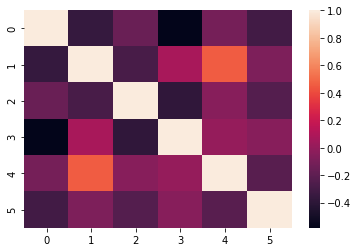

In [120]:
heatmap4 = sb.heatmap(getCorrMatrix(orderedD1, orderedD1))